In [61]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np

In [62]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [63]:
y_train = y_train.reshape(-1,)

In [64]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

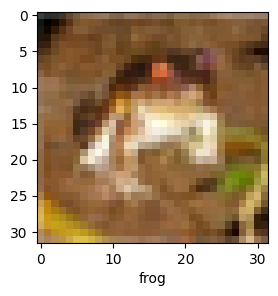

In [65]:
def plot_dataset(x, y, index):
    plt.figure(figsize = (10,3))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
plot_dataset(x_train, y_train, 0)

In [66]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [67]:
# ANN
# model = models.Sequential([
#         layers.Flatten(input_shape=(32,32,3)),
#         # layers.Dense(3000, activation='relu'),
#         layers.Dense(1000, activation='relu'),
#         # layers.Dense(10, activation='softmax')
#     ])

# model.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=5)

In [68]:
# cnn
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [69]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
model.fit(x_train, y_train, epochs=2)


Epoch 1/2
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4743 - accuracy: 0.4717
Epoch 2/2
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1299 - accuracy: 0.6050


In [71]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 182.9981 - accuracy: 0.4998


[182.99810791015625, 0.4997999966144562]

In [72]:
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


In [73]:
y_classes = [np.argmax(i) for i in y_pred]


In [74]:
classes[y_classes[3]]

'ship'

In [75]:
classes[y_classes[4]]

'deer'